# Draw a tree from a Newick File

In this notebook we are going to explore trees from a newick file.

This line allows to expand the view of the notebook 

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

We start with installing the libraries allowing us to use the R cell magic.

In [10]:
!conda install -y -c conda-forge rpy2 
!conda install -y -c conda-forge r

Fetching package metadata ...........
Solving package specifications: ..........

# All requested packages already installed.
# packages in environment at /opt/conda:
#
rpy2                      2.9.3              py35r3.4.1_0    conda-forge
Fetching package metadata ...........
Solving package specifications: ..........

# All requested packages already installed.
# packages in environment at /opt/conda:
#
r                         3.4.1                  r3.4.1_0    conda-forge


We then load the library for R cell magic.

In [11]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


We then install and import R libraries.

In [12]:
%%R
source("https://bioconductor.org/biocLite.R")
biocLite("ggtree",suppressUpdates=TRUE)
biocLite("treeio",suppressUpdates=TRUE)
biocLite("ggplot2",suppressUpdates=TRUE)
biocLite("ape",suppressUpdates=TRUE)
biocLite("RColorBrewer",suppressUpdates=TRUE)

/opt/conda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: A new version of Bioconductor is available after installing the most recent
  version of R; see http://bioconductor.org/install

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: BioC_mirror: https://bioconductor.org

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.1 (2017-06-30).

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Installing package(s) ‘ggtree’

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.5/site-packag

In [13]:
%%R
library("treeio")
library("ggtree")
library("ggplot2")
library("ape")
library("RColorBrewer")

Let's read the newick tree and set the wild type as an outgroup

In [30]:
nwk_file=get(2588)

In [22]:
ls

2587  core.25  ipython_galaxy_notebook.ipynb


In [31]:
%%R
tree <- read.tree(file= "2588" )
my_tree <- root(tree, which(tree$tip.label == grep("wtP",tree$tip.label, value=TRUE)))

Let's choose a color palette.

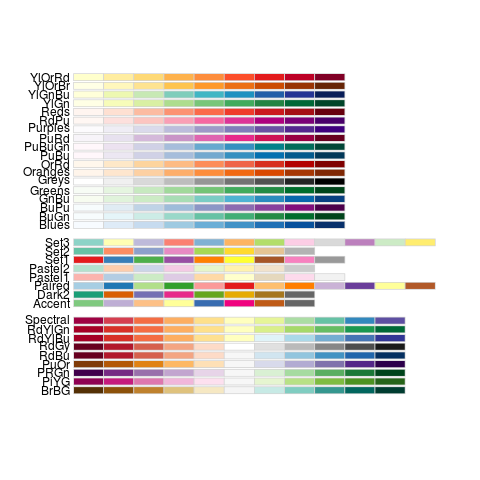

In [32]:
%%R
display.brewer.all()

We create 10 groupe corresponding to the 10 condition and draw a tree with a different color for each group.

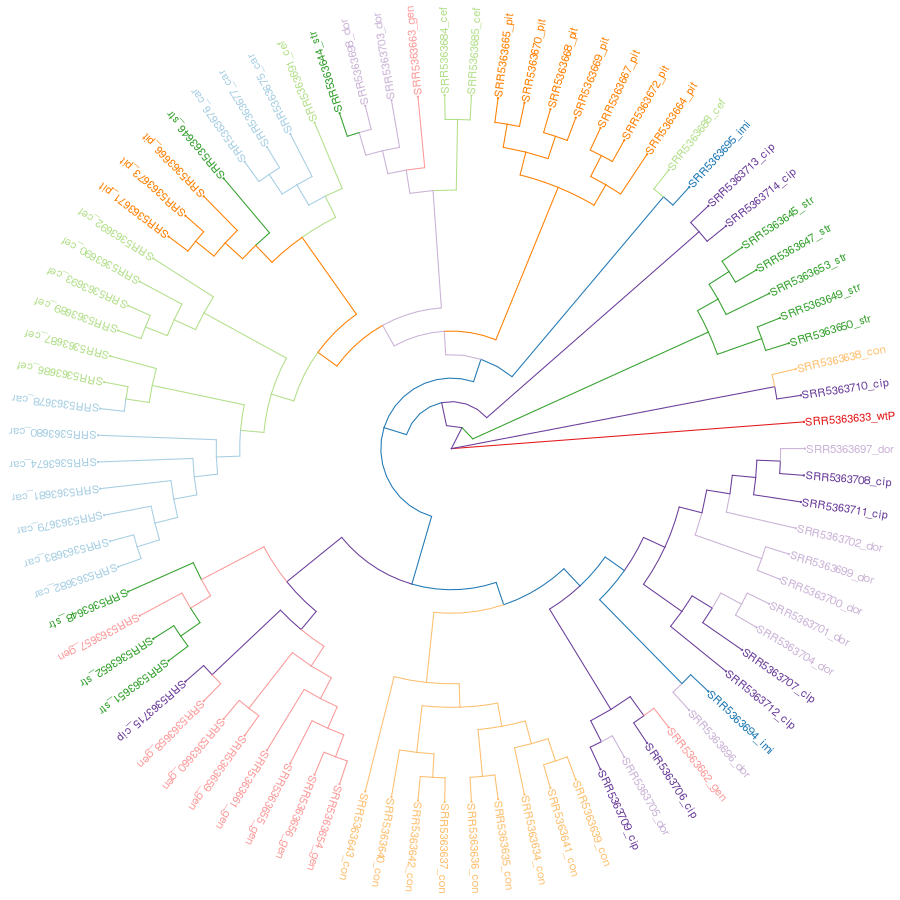

In [33]:
%%R -w 900 -h 900

cls <- list(c1=grep("car",my_tree$tip.label),
            c2=grep("cef",my_tree$tip.label),
            c3=grep("str",my_tree$tip.label),
            c4=grep("gen",my_tree$tip.label),
            c5=grep("wtP",my_tree$tip.label),
            c6=grep("con",my_tree$tip.label),
            c7=grep("pit",my_tree$tip.label),
            c8=grep("dor",my_tree$tip.label),
            c9=grep("cip",my_tree$tip.label),
            c10=grep("imi",my_tree$tip.label))
tree = groupOTU(my_tree, focus= cls)
ggtree(tree, branch.length="none",aes(color=group, angle=angle,subset=isTip),layout="circular") + geom_tiplab(mapping = NULL,size=4, align=TRUE, geom = "text")+ scale_color_brewer(palette = "Paired")


We also want to take a more detailed look of the relationship between samples within each condition.

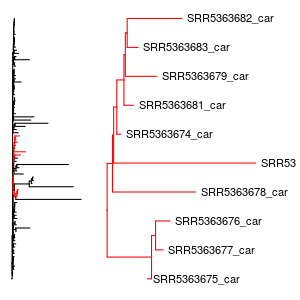

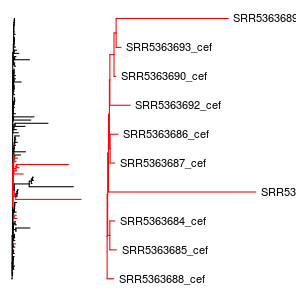

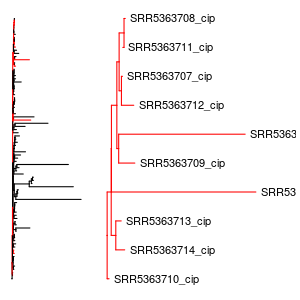

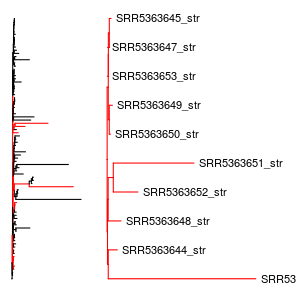

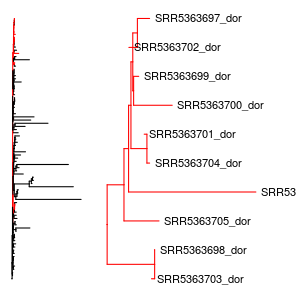

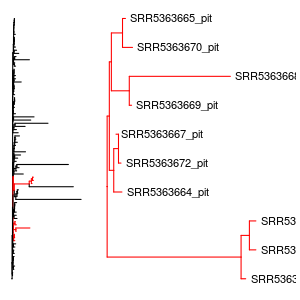

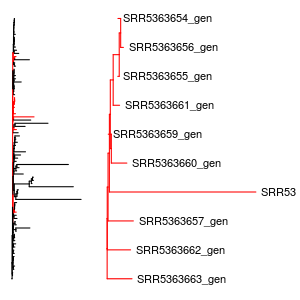

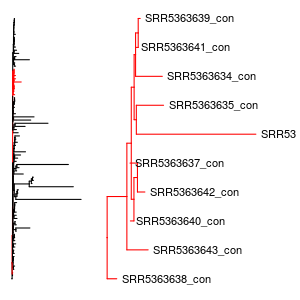

In [35]:
%%R -w 300 -h 300

for(condition in list('car','cef','cip','str','dor','pit','gen','con')){
    gzoom(my_tree, grep(condition,my_tree$tip.label))
}